**Question 1**

In [226]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [228]:
df = pd.read_csv('/content/titanic.csv')

In [229]:
df.head()

,PassengerId,Name,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,373450,8.0500,NaN,S,0


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Ticket       891 non-null    object 
 6   Fare         891 non-null    float64
 7   Cabin        204 non-null    object 
 8   Embarked     889 non-null    object 
 9   Survived     891 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [231]:
df.describe()

,PassengerId,Pclass,Age,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,32.204208,0.383838
std,257.353842,0.836071,14.526497,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,512.329200,1.000000


In [232]:
df.drop(['Name','Ticket','Cabin'], axis = 1, inplace = True)

In [233]:
for i in range(len(df['Sex'])):
    if df.loc[i,'Sex'] == 'female':
        df.loc[i,'Sex'] = 1
    else:
        df.loc[i,'Sex'] = 0

In [234]:
for i in range(len(df['Embarked'])):
    if df.loc[i,'Embarked'] == 'S':
        df.loc[i,'Embarked'] = 0
    elif df.loc[i,'Embarked'] == 'C':
        df.loc[i,'Embarked'] = 1
    else:
        df.loc[i, 'Embarked'] = 2

In [235]:
df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Survived
0,1,3,0,22.0,7.2500,0,0
1,2,1,1,38.0,71.2833,1,1
2,3,3,1,26.0,7.9250,0,1
3,4,1,1,35.0,53.1000,0,1
4,5,3,0,35.0,8.0500,0,0


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    object 
 6   Survived     891 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


In [237]:
df.dropna(inplace=True)

In [238]:
df.reset_index(drop = True, inplace = True)

In [239]:
df['Sex'] = df['Sex'].astype('float')

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Pclass       714 non-null    int64  
 2   Sex          714 non-null    float64
 3   Age          714 non-null    float64
 4   Fare         714 non-null    float64
 5   Embarked     714 non-null    object 
 6   Survived     714 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 39.2+ KB


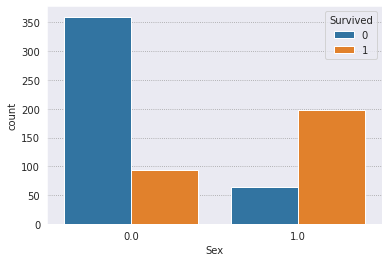

In [241]:
sns.countplot(x = 'Sex', hue = 'Survived',data =df)

In [242]:
df.drop('PassengerId', inplace = True, axis = 1)

In [243]:
df

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,0.0,22.0,7.2500,0,0
1,1,1.0,38.0,71.2833,1,1
2,3,1.0,26.0,7.9250,0,1
3,1,1.0,35.0,53.1000,0,1
4,3,0.0,35.0,8.0500,0,0
...,...,...,...,...,...,...
709,3,1.0,39.0,29.1250,2,0
710,2,0.0,27.0,13.0000,0,0
711,1,1.0,19.0,30.0000,0,1
712,1,0.0,26.0,30.0000,1,1


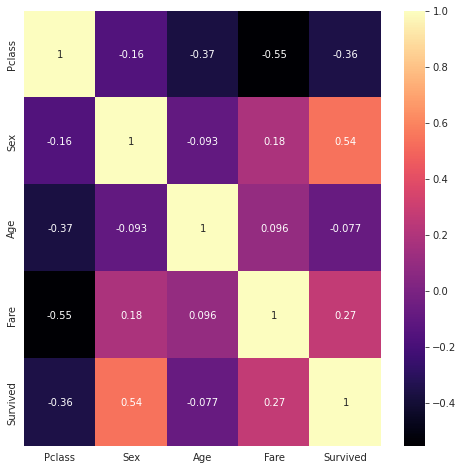

In [244]:
fig = plt.figure( figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap = 'magma')

In [245]:
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,0.0,22.0,7.2500,0,0
1,1,1.0,38.0,71.2833,1,1
2,3,1.0,26.0,7.9250,0,1
3,1,1.0,35.0,53.1000,0,1
4,3,0.0,35.0,8.0500,0,0


In [246]:
dic = {}
for i in df['Age']:
    if i not in dic:
        dic[i] = 1
    else:
        dic[i]+=1
for i in dic:
    dic[i] = dic[i] / len(df['Age'])

In [247]:
x = [i for i in dic ]
y = [dic[i] for i in dic]

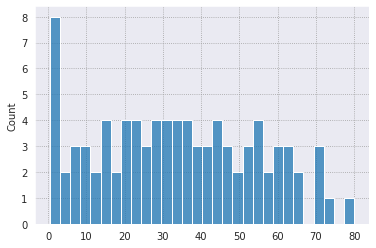

In [248]:
sns.histplot(x, bins = 30)

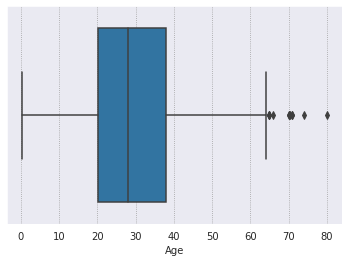

In [249]:
sns.boxplot(x = 'Age', data = df)

In [250]:
rows2Delete = np.where(df['Age'] > 65)

In [251]:
for i in rows2Delete:
    df.drop(i , inplace = True)

In [252]:
df.reset_index(inplace = True, drop = True)

In [253]:
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,0.0,22.0,7.2500,0,0
1,1,1.0,38.0,71.2833,1,1
2,3,1.0,26.0,7.9250,0,1
3,1,1.0,35.0,53.1000,0,1
4,3,0.0,35.0,8.0500,0,0


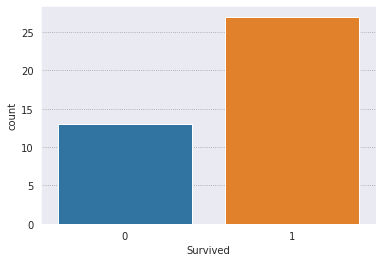

In [254]:
sns.countplot(x = 'Survived', data = df[df['Age'] < 5])

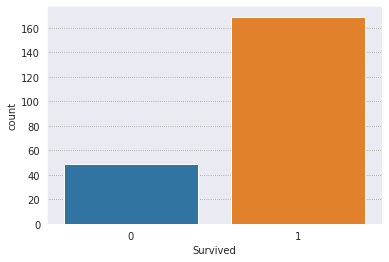

In [255]:
sns.countplot(data = df[df['Age']>15][df[df['Age']>15]['Sex']==1] , x = 'Survived')

In [256]:
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,0.0,22.0,7.2500,0,0
1,1,1.0,38.0,71.2833,1,1
2,3,1.0,26.0,7.9250,0,1
3,1,1.0,35.0,53.1000,0,1
4,3,0.0,35.0,8.0500,0,0


In [257]:
# sns.countplot(data = df, x= 'Child')

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    706 non-null    int64  
 1   Sex       706 non-null    float64
 2   Age       706 non-null    float64
 3   Fare      706 non-null    float64
 4   Embarked  706 non-null    object 
 5   Survived  706 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 33.2+ KB


In [259]:
df.head()

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,0.0,22.0,7.2500,0,0
1,1,1.0,38.0,71.2833,1,1
2,3,1.0,26.0,7.9250,0,1
3,1,1.0,35.0,53.1000,0,1
4,3,0.0,35.0,8.0500,0,0


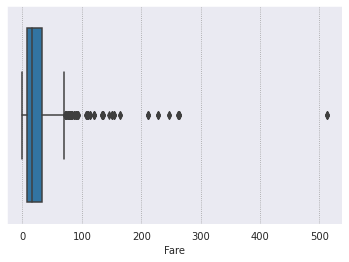

In [260]:
sns.boxplot(x ='Fare', data = df)

In [261]:
for i in range(len(df['Fare'])):
    if df.loc[i, 'Fare'] > 130:
        df.drop(i,inplace = True)

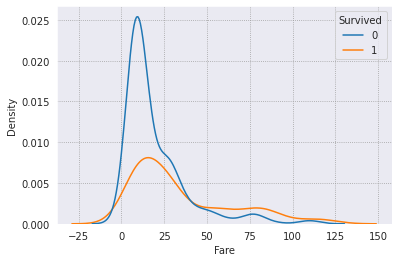

In [262]:
sns.kdeplot(data = df, x= 'Fare', hue = 'Survived')

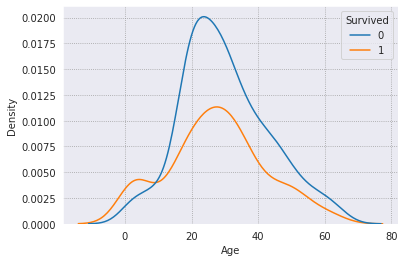

In [263]:
sns.kdeplot(data = df, x= 'Age', hue = 'Survived')

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 705
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    672 non-null    int64  
 1   Sex       672 non-null    float64
 2   Age       672 non-null    float64
 3   Fare      672 non-null    float64
 4   Embarked  672 non-null    object 
 5   Survived  672 non-null    int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 52.9+ KB


In [265]:
df.reset_index(drop = True, inplace = True)

In [266]:
df

,Pclass,Sex,Age,Fare,Embarked,Survived
0,3,0.0,22.0,7.2500,0,0
1,1,1.0,38.0,71.2833,1,1
2,3,1.0,26.0,7.9250,0,1
3,1,1.0,35.0,53.1000,0,1
4,3,0.0,35.0,8.0500,0,0
...,...,...,...,...,...,...
667,3,1.0,39.0,29.1250,2,0
668,2,0.0,27.0,13.0000,0,0
669,1,1.0,19.0,30.0000,0,1
670,1,0.0,26.0,30.0000,1,1


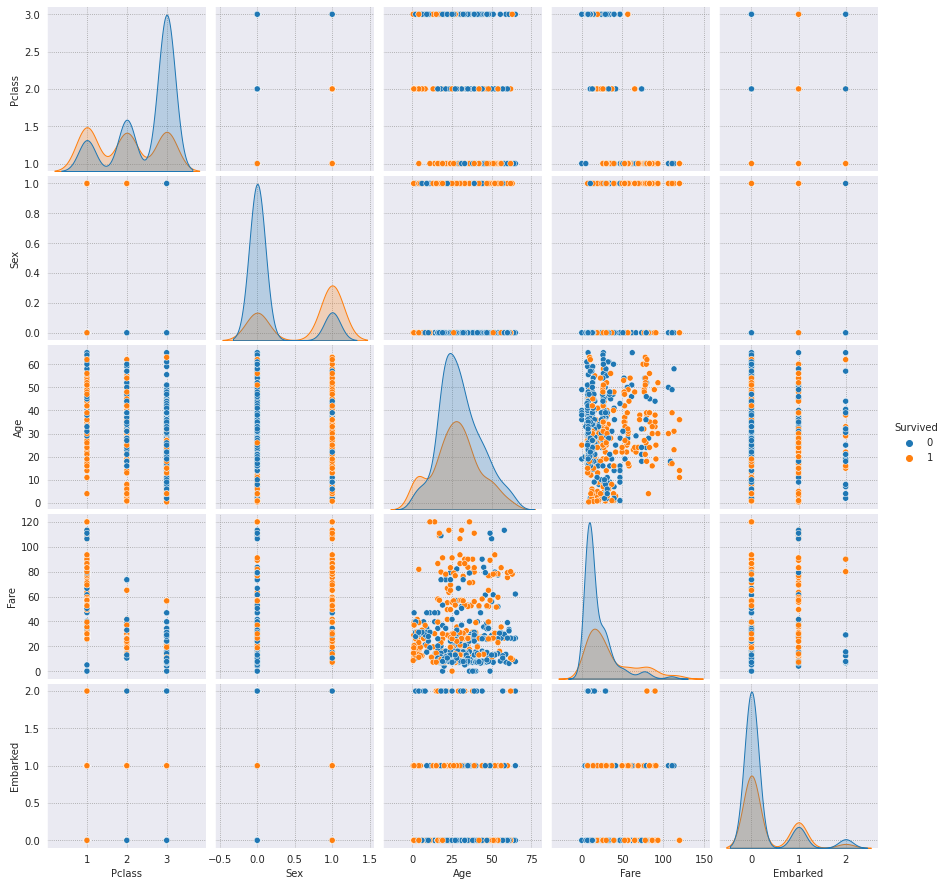

In [267]:
sns.pairplot(df , hue = 'Survived')

In [268]:
X= np.array(df.iloc[:,0:-1])
y = np.array(df.iloc[:,-1])

In [269]:
# sns.kdeplot(x = 'Pclass', hue = 'Survived', data = df )

In [270]:
class bayesClassifier:
    import math
    def __init__(self):
        self.probabilites = {}
        self.classes = {}
    def gaussianLikelihood(self,x,mean,sd):
        return (1/(2*math.pi*(sd**2))**0.5 )* math.exp((-(x - mean)**2) / (2*sd*sd))
    def probabilityClasses(self,li):
        dic = {}
        n = len(li)
        for i in li:
            if i not in dic:
                dic[i] = 1
            else:
                dic[i] += 1
        for i in dic:
            dic[i] = dic[i] / n
        return dic
    def fit(self,x,y):
        self.classes = self.probabilityClasses(y)
        for i in range(len(x[0])):
            self.probabilites[i] = {}
            if len(np.unique(x[:,i])) > 0:
                xCopy = x[:,i].copy()
                for cl in self.classes:
                    self.probabilites[i][cl] = [np.mean(xCopy[y == cl]),np.std(xCopy[y == cl])]
#             else:
#                 xCopy = x[:,i].copy()
#                 for cl in self.classes:
#                     self.probabilites[i][cl] = self.probabilityClasses(xCopy[y == cl].copy())
    def predictOne(self,x):
        result = {} 
        for cl in self.classes:
            sum_ = 0
            for i in range(len(x)):
                if type(self.probabilites[i][cl]) == list:
                    sum_ += math.log(self.gaussianLikelihood(x[i],self.probabilites[i][cl][0],self.probabilites[i][cl][1]))
                else:
                    if x[i] in self.probabilites[i][cl]:
                        sum_ += math.log(self.probabilites[i][cl][x[i]])
                    else:
                        sum_  = -float("inf")
            sum_ += math.log(self.classes[cl])
            result[sum_] = cl
        inx = max(result)
        return result[inx] , math.exp(inx)
    
    def predict(self,x_):
        x = x_.copy()
        y = []
        prob = []
        for i in x:
            temp = self.predictOne(i)
            y.append(temp[0])
            prob.append(temp[1])
        return np.array(y) , np.array(prob)

In [271]:
bc = bayesClassifier()

In [272]:
from sklearn.model_selection import train_test_split as tts

In [273]:
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.3,random_state=12)

In [274]:
bc.fit(X_train,y_train)

In [275]:
y_pred,prob = bc.predict(X_test)

In [276]:
from sklearn.metrics import accuracy_score, classification_report

In [277]:
accuracy_score(y_test, y_pred)

0.7574257425742574

In [278]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       116
           1       0.72      0.71      0.71        86

    accuracy                           0.76       202
   macro avg       0.75      0.75      0.75       202
weighted avg       0.76      0.76      0.76       202



In [279]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [280]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       116
           1       0.72      0.71      0.71        86

    accuracy                           0.76       202
   macro avg       0.75      0.75      0.75       202
weighted avg       0.76      0.76      0.76       202



In [281]:
models = [MultinomialNB, GaussianNB]
dic = {0 : 'MultinomialNB' , 1 : 'GaussianNB'}
for model in range(len(models)):
    xModel = models[model]()
    xModel.fit(X = X_train, y = y_train)
    ypred_ = xModel.predict(X_test)
    print(dic[model],'==> Accuracy on Test Split ==>',accuracy_score(y_test, ypred_))

MultinomialNB ==> Accuracy on Test Split ==> 0.7128712871287128
GaussianNB ==> Accuracy on Test Split ==> 0.7574257425742574


In [282]:
def maxFreq(x):
    dic_ = {}
    for i in x:
        if i not in dic_:
            dic_[i] = 1
        else:
            dic_[i]+=1
    m = -float("inf")
    index = -1
    for i in dic_:
        if dic_[i] >= m:
            m = dic_[i]
            index = i
    return index

In [283]:
def kFold(x,y,model,k=5):
    xlist = []
    ylist = []
    part = int(len(x)/k)
    for i in range(k):
        tempx = [x[j] for j in range(part*i ,part*i + part)]
        tempy = [y[j] for j in range(part*i, part*i + part)]
        xlist.append(tempx)
        ylist.append(tempy)
    res = []
    for i in range(k):
        xtrain = []
        ytrain = []
        xtest = []
        ytest = []
        for j in range(k):
            if i!=j:
                xtrain.extend(xlist[j])
                ytrain.extend(ylist[j])
            else:
                xtest.extend(xlist[j])
                ytest.extend(ylist[j])
        model.fit(np.array(xtrain),np.array(ytrain))
        ypred = model.predict(np.array(xtest))[0]
        res.append([accuracy_score(ytest, ypred), maxFreq(ypred)])
    return res , np.mean(np.array(res)[:,0])

In [284]:
results, avgResult = kFold(X_train, y_train ,bayesClassifier(), k = 5)

In [285]:
df_ = pd.DataFrame()
df_['Results'] = [i[0] for i in results]
df_['Index'] = [i for i in range(1,len(results)+1)]

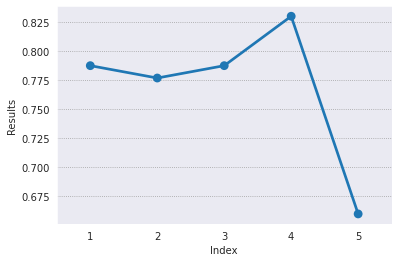

In [286]:
sns.pointplot(x = 'Index', y = 'Results', data = df_)

In [287]:
for i in results:
    print("Accuracy -->",i[0],"--> Maximum occuring Class -->",i[1])

Accuracy --> 0.7872340425531915 --> Maximum occuring Class --> 0
Accuracy --> 0.776595744680851 --> Maximum occuring Class --> 0
Accuracy --> 0.7872340425531915 --> Maximum occuring Class --> 0
Accuracy --> 0.8297872340425532 --> Maximum occuring Class --> 0
Accuracy --> 0.6595744680851063 --> Maximum occuring Class --> 0


In [288]:
print("Average Accuracy -->",avgResult)

Average Accuracy --> 0.7680851063829788


In [289]:
prob

array([7.47636964e-05, 2.32162214e-05, 1.10000500e-05, 3.38504979e-06,
       8.91540803e-05, 3.63067150e-05, 1.38073896e-05, 3.60438715e-06,
       6.84293268e-05, 1.27448816e-07, 4.26819835e-06, 9.57156860e-08,
       2.13777315e-05, 8.94703485e-06, 9.56222952e-05, 2.01246481e-05,
       7.23724417e-05, 5.10328995e-08, 9.68466003e-06, 8.45869955e-07,
       3.64190016e-06, 2.92049356e-07, 1.13118345e-04, 9.42414304e-05,
       9.76883974e-05, 1.38698181e-05, 1.62191227e-06, 7.77332487e-06,
       1.51614682e-05, 3.15810835e-07, 8.51536236e-05, 2.44243161e-06,
       4.53269198e-06, 2.89876521e-05, 9.12612201e-05, 7.01235345e-05,
       1.62222731e-08, 8.06077080e-05, 3.37690221e-05, 1.12079201e-06,
       2.94578789e-05, 3.76499352e-06, 1.16937241e-04, 1.14869489e-04,
       5.00929271e-06, 1.01039420e-04, 3.52691465e-05, 1.13758219e-05,
       1.14752171e-05, 7.48473789e-05, 2.32005389e-05, 8.67215610e-05,
       2.30692263e-05, 4.00212193e-06, 5.69897787e-06, 4.33467063e-05,
      

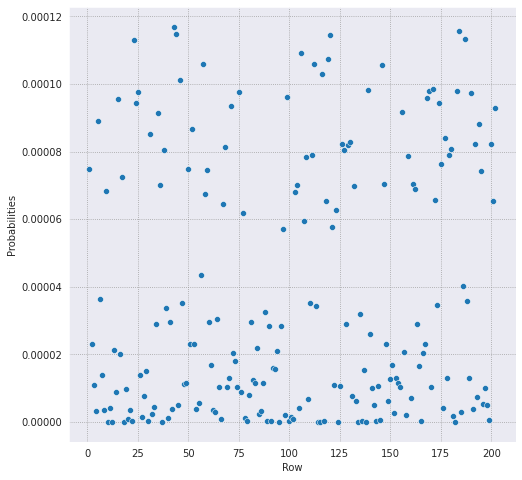

In [290]:
df_ = pd.DataFrame()
df_['Row'] = [i+1 for i in range(202)]
df_['Probabilities'] = prob
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x = 'Row',y = 'Probabilities', data = df_)

In [292]:
mbc = MultinomialNB()

In [293]:
from sklearn.model_selection import cross_val_predict,cross_val_score,KFold

In [294]:
results = cross_val_score(mbc,X_train, y_train,cv=5 )

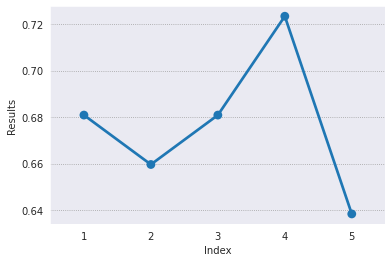

In [295]:
df_ = pd.DataFrame()
df_['Results'] = results
df_['Index'] = [i for i in range(1,len(results)+1)]
sns.pointplot(x = 'Index', y = 'Results', data = df_)

In [296]:
np.mean(results)

0.676595744680851

**Question 2**

In [297]:
file = open('/content/dataset.txt', 'r')

In [298]:
array = []
for i in file.readlines():
    array.append(i)

In [299]:
array = [array[i].split('\t') for i in range(len(array))]

In [300]:
for i in range(len(array)):
    array[i][-1] = array[i][-1][0]

In [301]:
X = []
for i in range(len(array)):
    l = []
    for j in array[i]:
        if j!= '':
            l.append(float(j))
    X.append(l)

In [302]:
X = np.array(X)

In [303]:
df = pd.DataFrame(X)

In [304]:
df.columns = ['area','perimeter','compactness','lengthKernel','widthKernel','As.coeff','lengthKernelGroove','class']

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area                210 non-null    float64
 1   perimeter           210 non-null    float64
 2   compactness         210 non-null    float64
 3   lengthKernel        210 non-null    float64
 4   widthKernel         210 non-null    float64
 5   As.coeff            210 non-null    float64
 6   lengthKernelGroove  210 non-null    float64
 7   class               210 non-null    float64
dtypes: float64(8)
memory usage: 13.2 KB


In [306]:
df.describe()

,area,perimeter,compactness,lengthKernel,widthKernel,As.coeff,lengthKernelGroove,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [307]:
df.head()

,area,perimeter,compactness,lengthKernel,widthKernel,As.coeff,lengthKernelGroove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [308]:
columns = ['area','perimeter','compactness','lengthKernel','widthKernel','As.coeff','lengthKernelGroove']

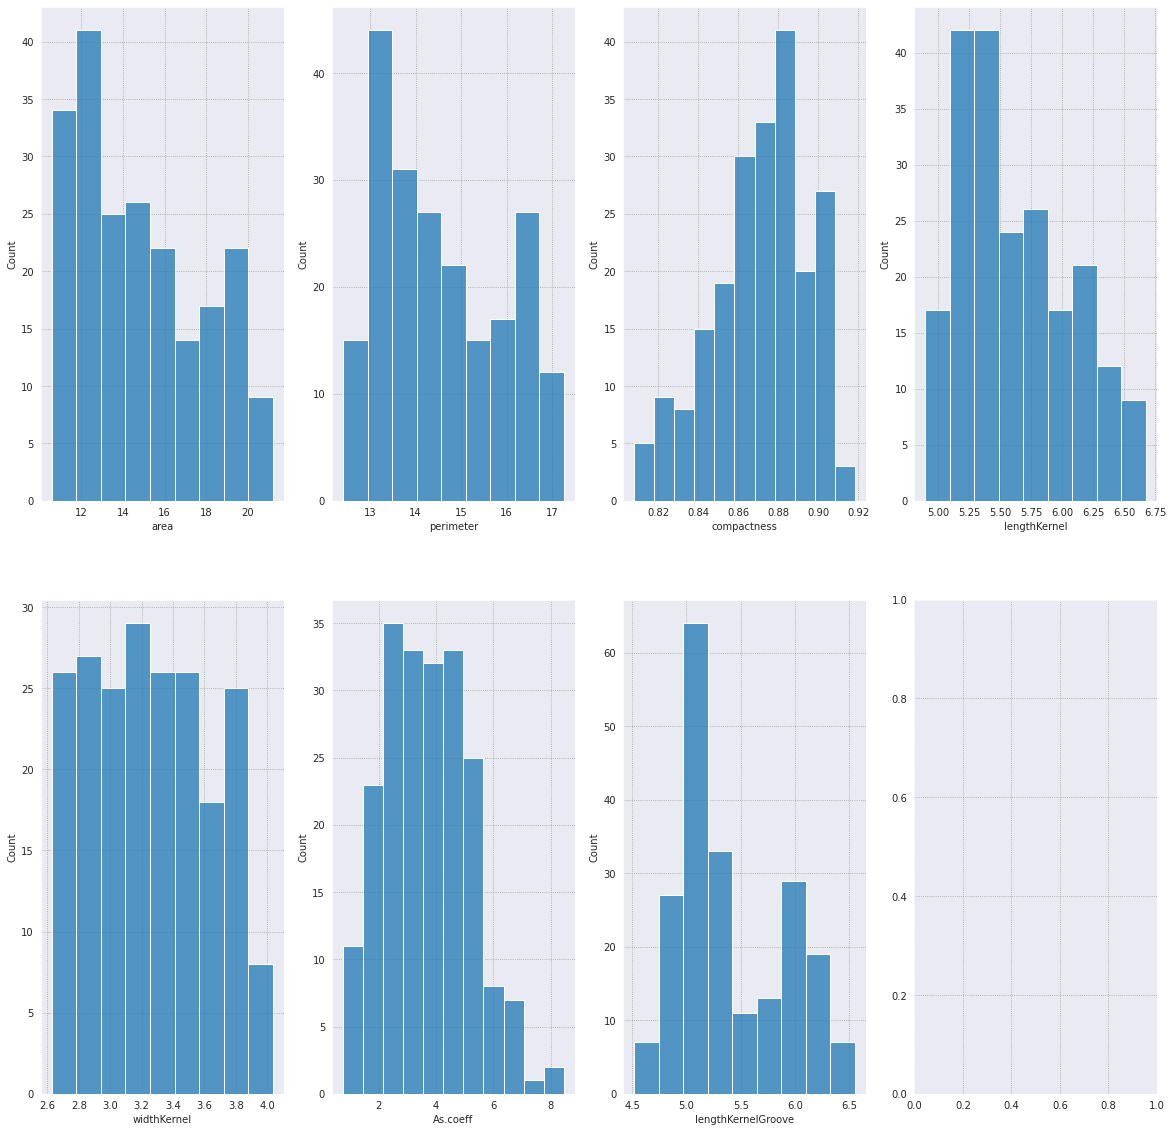

In [309]:
figure, axes = plt.subplots(2,4,figsize = (20,20))
row = 0
col = 0
for name in columns:
    sns.histplot(ax= axes[row,col], x = name, data = df)
    col+=1
    if col == 4:
        col = 0
        row = 1
    if row + col == 4 and row == 1:
        break

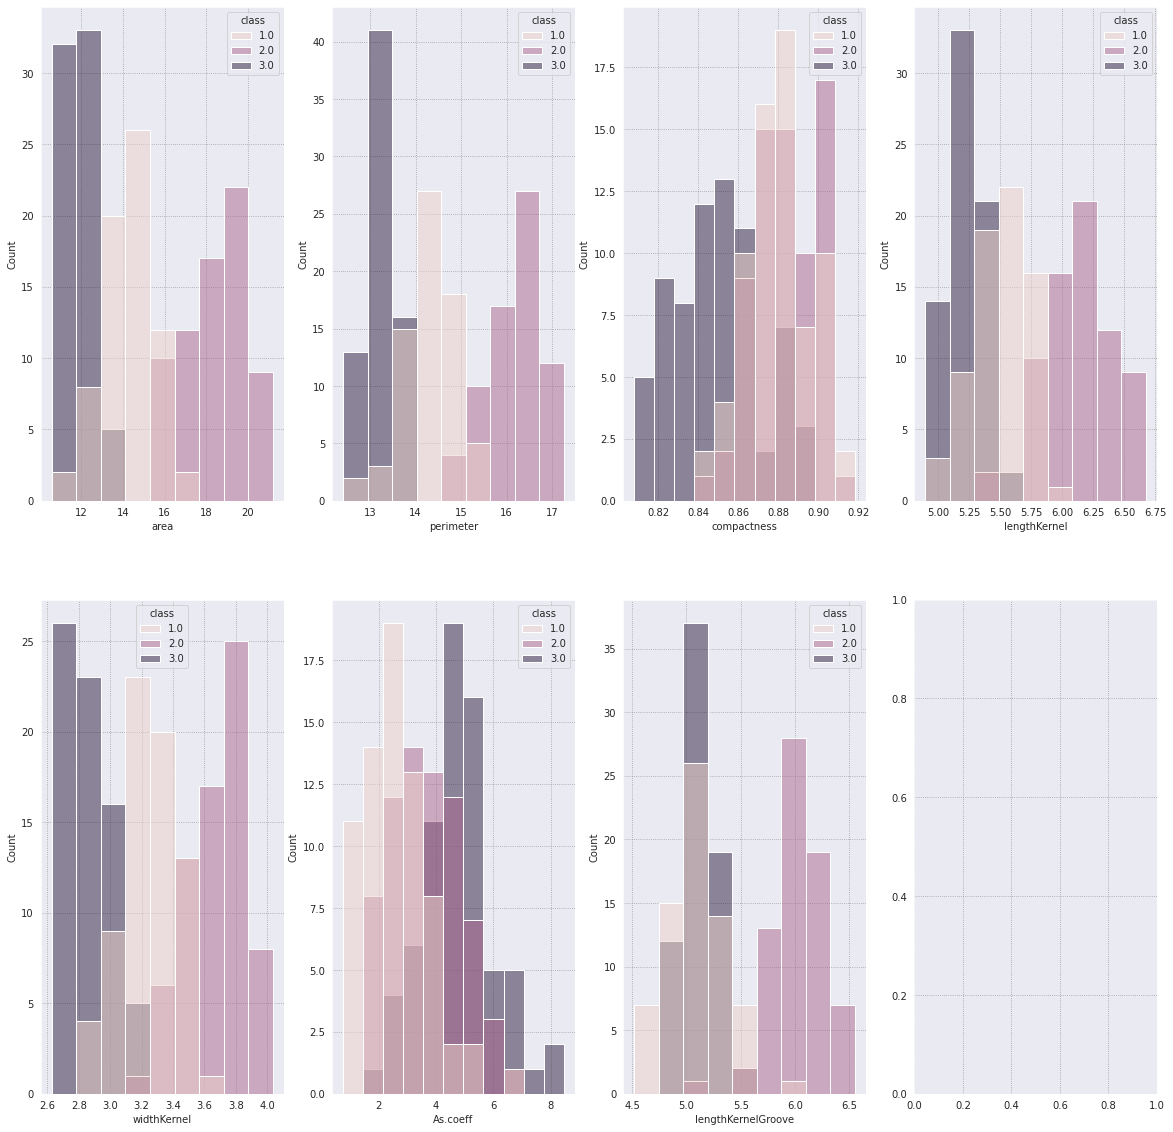

In [310]:
figure, axes = plt.subplots(2,4,figsize = (20,20))
row = 0
col = 0
for name in columns:
    sns.histplot(ax= axes[row,col], x = name, data = df, hue = 'class')
    col+=1
    if col == 4:
        col = 0
        row = 1
    if row + col == 4 and row == 1:
        break

In [311]:
def priorProbabilities(x):
    n = len(x)
    dic = {}
    for i in x:
        if i not in dic:
            dic[i] = 1
        else:
            dic[i] += 1
    for i in dic:
        dic[i] = dic[i]/n
    return dic

In [312]:
priors = priorProbabilities(df['class'])

In [313]:
class discretizer:
    def __init__(self,df):
        self.df = df
    def discrete(self, column, bins = 10):
        X_ = np.array(self.df[column])
        X = np.array(self.df[column])
        Xsort = np.sort(X)
        binsize = int(len(X) / bins)
        vals = [0] + [Xsort[i] for i in range(binsize-1, len(X)-binsize + 1 ,binsize)] + [Xsort[-1]]
        for v in range(len(vals)):
            for j in range(len(X)):
                if vals[v] < X[j] <= vals[v+1]:
                    X_[j] = v
        self.df[column] = X_

In [314]:
di = discretizer(df)

In [315]:
for col in df.columns[:-1]:
    di.discrete(col)

In [316]:
df_trans = di.df

In [317]:
df_trans.head()

,area,perimeter,compactness,lengthKernel,widthKernel,As.coeff,lengthKernelGroove,class
0,5.0,6.0,4.0,6.0,5.0,1.0,4.0,1.0
1,5.0,5.0,6.0,5.0,5.0,0.0,1.0,1.0
2,4.0,4.0,9.0,2.0,5.0,2.0,0.0,1.0
3,4.0,4.0,8.0,3.0,5.0,2.0,0.0,1.0
4,6.0,6.0,9.0,5.0,7.0,0.0,4.0,1.0


In [318]:
df_trans.describe()

,area,perimeter,compactness,lengthKernel,widthKernel,As.coeff,lengthKernelGroove,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,4.500000,4.495238,4.495238,4.500000,4.495238,4.500000,4.485714,2.000000
std,2.879145,2.884122,2.872486,2.879145,2.884122,2.879145,2.870788,0.818448
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,2.000000
75%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,3.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000


In [319]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   area                210 non-null    float64
 1   perimeter           210 non-null    float64
 2   compactness         210 non-null    float64
 3   lengthKernel        210 non-null    float64
 4   widthKernel         210 non-null    float64
 5   As.coeff            210 non-null    float64
 6   lengthKernelGroove  210 non-null    float64
 7   class               210 non-null    float64
dtypes: float64(8)
memory usage: 13.2 KB


In [320]:
for col in df_trans.columns:
    print(col,'==>',df[col].nunique())

area ==> 10
perimeter ==> 10
compactness ==> 10
lengthKernel ==> 10
widthKernel ==> 10
As.coeff ==> 10
lengthKernelGroove ==> 10
class ==> 3


In [321]:
X = np.array(df_trans.iloc[:, :-1])
y = np.array(df_trans.iloc[:,-1])

In [322]:
def customDic(dic):
    sum = 0
    for i in dic:
        sum += dic[i]
    for i in dic:
        dic[i] = dic[i] / sum
    return dic

In [323]:
def custom2Ddic(dic):
    for di in dic:
        dic[di] = customDic(dic[di])
    return dic

In [324]:
def getLikelihoods(X,y):
    mainDic = {}
    for i in range(X.shape[1]):
        colDic = {}
        for jy,j in enumerate(X[:,i]):
            if j not in colDic:
                colDic[j] = {y[jy]:1}
            else:
                if y[jy] not in colDic[j]:
                    colDic[j].update({y[jy]:1})
                else:
                    colDic[j][y[jy]]+=1
        mainDic[i] = custom2Ddic(colDic)
    return mainDic

In [325]:
def getLikelihoods(X,y):
    mainDic = {}
    for i in range(X.shape[1]):
        colDic= {}
        for ji,j in enumerate(y):
            if j not in colDic:
                colDic[j] = {X[ji][i] : 1}
            else:
                if X[ji][i] not in colDic[j]:
                    colDic[j][X[ji][i]] = 1
                else:
                    colDic[j][X[ji][i]] += 1
        mainDic[i] = custom2Ddic(colDic)
    return mainDic

In [326]:
likelihoods = getLikelihoods(X,y)

In [327]:
likelihoods

{0: {1.0: {0.0: 0.014285714285714285,
   1.0: 0.014285714285714285,
   2.0: 0.04285714285714286,
   3.0: 0.12857142857142856,
   4.0: 0.3,
   5.0: 0.3,
   6.0: 0.15714285714285714,
   7.0: 0.04285714285714286},
  2.0: {6.0: 0.14285714285714285, 7.0: 0.2571428571428571, 8.0: 0.3, 9.0: 0.3},
  3.0: {0.0: 0.2857142857142857,
   1.0: 0.2857142857142857,
   2.0: 0.2571428571428571,
   3.0: 0.17142857142857143}},
 1: {1.0: {0.0: 0.02857142857142857,
   1.0: 0.02857142857142857,
   2.0: 0.02857142857142857,
   3.0: 0.15714285714285714,
   4.0: 0.2571428571428571,
   5.0: 0.2857142857142857,
   6.0: 0.18571428571428572,
   7.0: 0.02857142857142857},
  2.0: {5.0: 0.014285714285714285,
   6.0: 0.11428571428571428,
   7.0: 0.2714285714285714,
   8.0: 0.3,
   9.0: 0.3},
  3.0: {0.0: 0.2714285714285714,
   1.0: 0.2857142857142857,
   2.0: 0.2571428571428571,
   3.0: 0.14285714285714285,
   4.0: 0.04285714285714286}},
 2: {1.0: {1.0: 0.02857142857142857,
   2.0: 0.07142857142857142,
   3.0: 0.114285

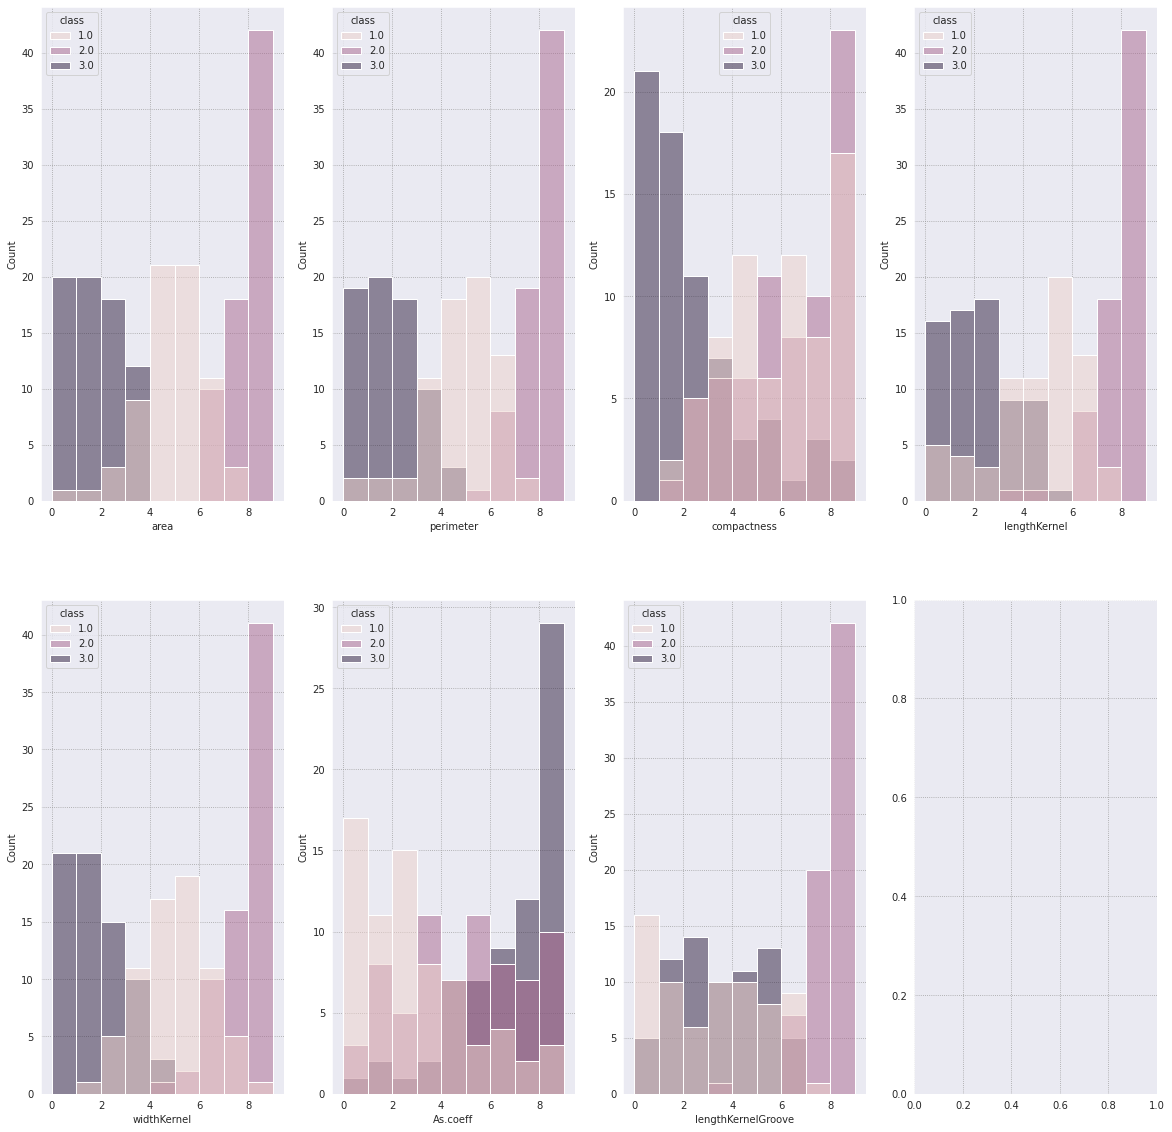

In [328]:
figure, axes = plt.subplots(2,4,figsize = (20,20))
row = 0
col = 0
for name in columns:
    sns.histplot(ax= axes[row,col], x = name, data = df_trans, hue = 'class')
    col+=1
    if col == 4:
        col = 0
        row = 1
    if row + col == 4 and row == 1:
        break

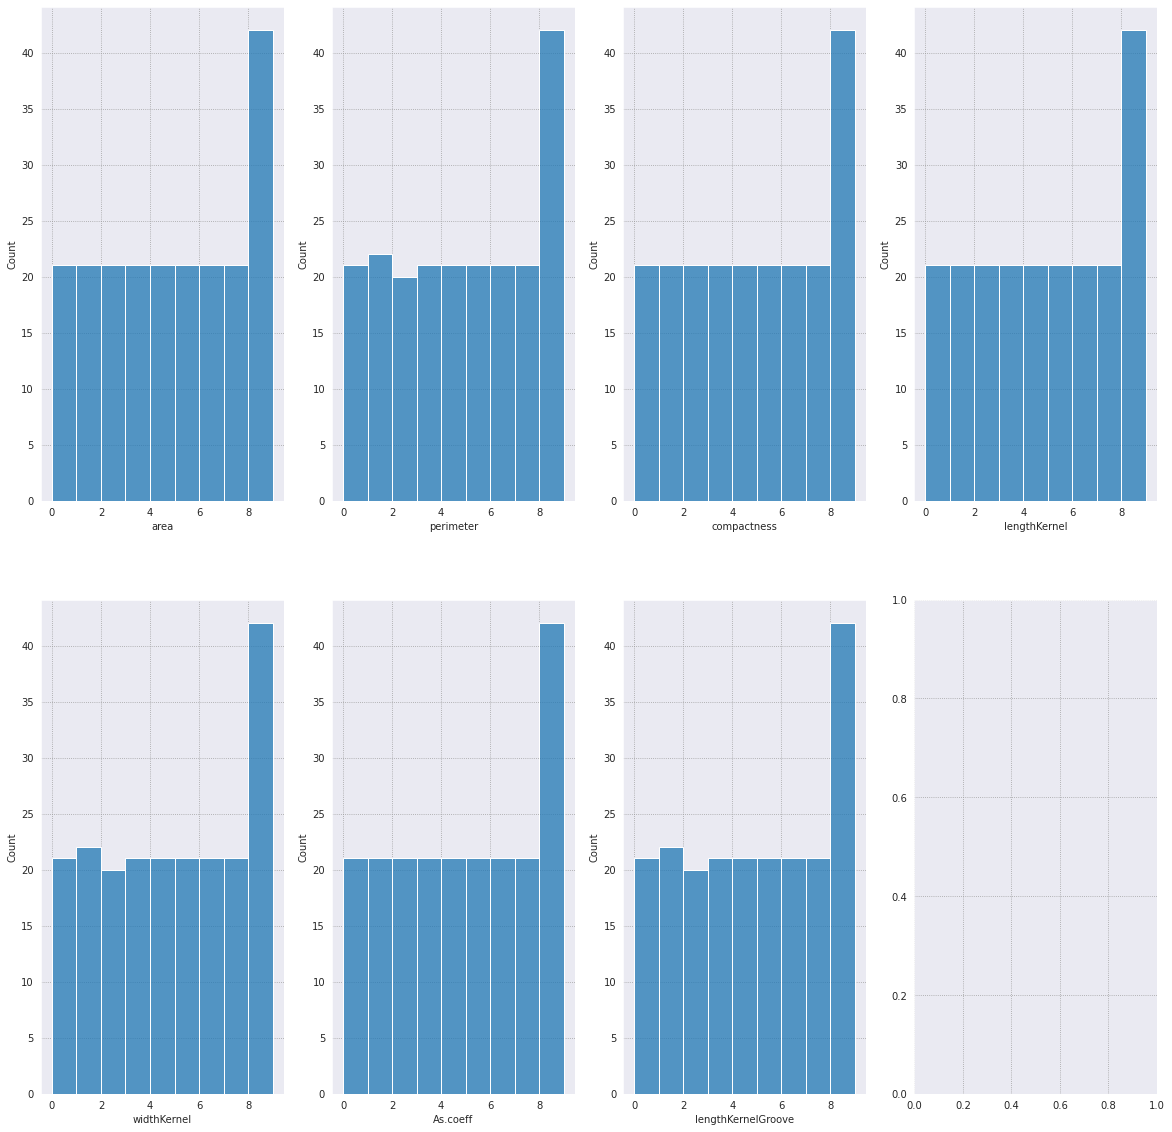

In [329]:
figure, axes = plt.subplots(2,4,figsize = (20,20))
row = 0
col = 0
for name in columns:
    sns.histplot(ax= axes[row,col], x = name, data = df_trans)
    col+=1
    if col == 4:
        col = 0
        row = 1
    if row + col == 4 and row == 1:
        break

In [330]:
def probX(X):
    dic = {}
    dic_ = {}
    for i in range(X.shape[0]):
        s = ''
        for item in X[i]:
            s+= str(item)
        if s not in dic_:
            dic[s] = 1
        else:
            dic[s] += 1
    for i in dic:
        dic[i] = dic[i]/len(X)
    return dic

In [331]:
PX = probX(X) 

In [332]:
priors

{1.0: 0.3333333333333333, 2.0: 0.3333333333333333, 3.0: 0.3333333333333333}

In [333]:
likelihoods

{0: {1.0: {0.0: 0.014285714285714285,
   1.0: 0.014285714285714285,
   2.0: 0.04285714285714286,
   3.0: 0.12857142857142856,
   4.0: 0.3,
   5.0: 0.3,
   6.0: 0.15714285714285714,
   7.0: 0.04285714285714286},
  2.0: {6.0: 0.14285714285714285, 7.0: 0.2571428571428571, 8.0: 0.3, 9.0: 0.3},
  3.0: {0.0: 0.2857142857142857,
   1.0: 0.2857142857142857,
   2.0: 0.2571428571428571,
   3.0: 0.17142857142857143}},
 1: {1.0: {0.0: 0.02857142857142857,
   1.0: 0.02857142857142857,
   2.0: 0.02857142857142857,
   3.0: 0.15714285714285714,
   4.0: 0.2571428571428571,
   5.0: 0.2857142857142857,
   6.0: 0.18571428571428572,
   7.0: 0.02857142857142857},
  2.0: {5.0: 0.014285714285714285,
   6.0: 0.11428571428571428,
   7.0: 0.2714285714285714,
   8.0: 0.3,
   9.0: 0.3},
  3.0: {0.0: 0.2714285714285714,
   1.0: 0.2857142857142857,
   2.0: 0.2571428571428571,
   3.0: 0.14285714285714285,
   4.0: 0.04285714285714286}},
 2: {1.0: {1.0: 0.02857142857142857,
   2.0: 0.07142857142857142,
   3.0: 0.114285

In [335]:
def posProb(x, y, index):
    global PX,likelihoods,priors
    prob = priors[y]
    for ix,i in enumerate(x):
        if i not in likelihoods[ix][y]:
            prob = 0
        else:
            prob *= likelihoods[ix][y][i]
    prob / PX[index]
    return prob

In [336]:
posteriors = []
for row in range(len(X)):
    x = X[row]
    index = ''
    for i in x:
        index += str(i)
    posteriors.append(posProb(x , y[row], index))

In [337]:
posteriors

[3.60268255573783e-06,
 1.3178182559987753e-05,
 1.8837049188688376e-06,
 6.139482698535472e-06,
 8.855639596232374e-07,
 3.837176686584669e-06,
 5.426310465877311e-06,
 3.837176686584669e-06,
 5.289341297297166e-10,
 1.8753119144962675e-08,
 5.240265535618662e-07,
 5.8365476969629995e-06,
 1.0986442723695057e-06,
 1.3733053404618823e-06,
 1.421774940713478e-06,
 1.637195386276126e-06,
 7.405077816216031e-08,
 8.174436550368345e-07,
 1.6479664085542582e-06,
 6.347209556756597e-08,
 2.3119618526294308e-06,
 5.149895026732058e-06,
 7.871679641095444e-07,
 8.257006616533682e-09,
 3.6950590315259784e-06,
 1.3507802264119783e-06,
 4.3443123188467385e-07,
 2.6446706486485815e-07,
 5.618067301889516e-06,
 1.0367108942702443e-06,
 1.7983760410810363e-07,
 9.607153481967547e-07,
 4.508325612627391e-07,
 4.119916021385646e-06,
 2.494164846280036e-06,
 4.571072791584651e-07,
 7.151189433945767e-07,
 2.0457948158141098e-09,
 4.961198140230684e-06,
 5.116235582112893e-07,
 2.0981053812612087e-06,
 

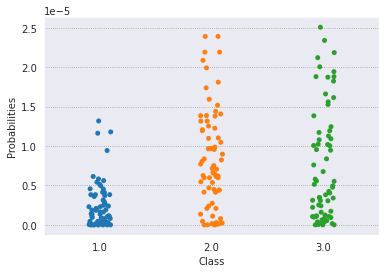

In [338]:
df_ = pd.DataFrame()
df_['index'] = [i+1 for i in range(len(posteriors))]
df_['Probabilities'] = posteriors
df_['Class'] = y
sns.stripplot(x = 'Class', y = 'Probabilities', data = df_)